<a href="https://colab.research.google.com/github/SuperLT-del/Digital-recognition/blob/main/Digital_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import matplotlib.pyplot
%matplotlib inline
import scipy.special
import imageio
import glob

In [2]:
#定义网络模型框架
class neuralNetwork:
    #初始化模型
    def _init_(self,inputnodes,hiddennodes,outputsnodes,learningrate):
        #设置输入层，隐藏层，输出层节点数目
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputsnodes
        #定义学习率
        self.ir=learningrate
        #创建两个链接权重矩阵
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        #激活函数
        self.activation_function=lambda x:scipy.special.expit(x)
        pass
    #模型训练
    def train(self,input_lists,targets_lists):
        #使输入列表转换为二维矩阵
        inputs=numpy.array(input_lists,ndmin=2).T
        targets=numpy.array(targets_lists,ndmin=2).T
        #通过激活函数与链接矩阵调节信号
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        #计算误差并进行权重的优化
        final_errors=targets-final_outputs
        hidden_errors=numpy.dot(self.who.T,final_errors)
        self.who+=self.ir*numpy.dot((final_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs))
        self.wih+=self.ir*numpy.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),numpy.transpose(inputs))
        pass
    def query(self,inputs_lists):
        #使输入列表转换为二维矩阵
        inputs=numpy.array(inputs_lists,ndmin=2).T
        #通过激活函数与链接矩阵调节信号
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        return final_outputs

In [3]:
#分别设置输入层，隐藏层，输出层节点数目
input_nodes=784
hidden_nodes=200
output_nodes=10
#学习率
learning_rate=0.1
#定义n为网络模型框架
n=neuralNetwork()
n._init_(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [4]:
# 读取下载得到的训练集
training_data_file = open("/content/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
#设置迭代次数
epochs = 5
for e in range(epochs):
    for record in training_data_list:
        #将所有数据通过逗号分隔开
        all_values=record.split(',')
        #将输入颜色值从较大的[0,255]缩放至[0.01,1]
        inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
        #使用值0.01和0.99分别代替整数0和整数1
        targets=numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass
    pass

In [6]:
# 读取下载得到的测试数据集
test_data_file=open("/content/mnist_test.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

In [7]:
#计分板，其中的每个数据有两种值：1和0
scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    #正确的数字结果
    correct_label=int(all_values[0])
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    #通过模型计算得到的一位数组
    outputs=n.query(inputs)
    #将数组中最大值对应的数字赋值给label
    label=numpy.argmax(outputs)
    #将计算得到的数字与正确的数字进行比较，如果相同则设值为1，不同则为0
    if(label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [8]:
#计算测试的正确率
scorecard_array=numpy.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)

performance =  0.9722


In [9]:
#我们自己的图像测试数据集
our_own_dataset = []
#加载png图像数据作为测试数据集
for image_file_name in glob.glob('/content/picture?.png'):
    #使用文件名来设置正确的标签
    label = int(image_file_name[-5:-4])
    print ("loading ... ", image_file_name)
    #将上传的PNG图片转换为数组
    img_array = imageio.imread(image_file_name, as_gray=True)
    #将28*28数组矩阵转换为包含784个像素值的列表
    img_data  = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    #附加标签和图像数据来测试数据集
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    pass

loading ...  /content/picture2.png
0.01
1.0
loading ...  /content/picture7.png
0.01
1.0
loading ...  /content/picture3.png
0.01
1.0
loading ...  /content/picture8.png
0.01
1.0
loading ...  /content/picture9.png
0.01
0.34
loading ...  /content/picture4.png
0.01
1.0
loading ...  /content/picture6.png
0.01
1.0
loading ...  /content/picture5.png
0.01
1.0
loading ...  /content/picture0.png
0.01
1.0
loading ...  /content/picture1.png
0.01
1.0


[[4.27933341e-03]
 [4.70213329e-03]
 [5.13782104e-02]
 [9.92525373e-01]
 [1.14547609e-03]
 [2.44288499e-03]
 [6.97961236e-04]
 [5.22608293e-04]
 [4.15657876e-04]
 [4.00006501e-03]]
network says  3
match!


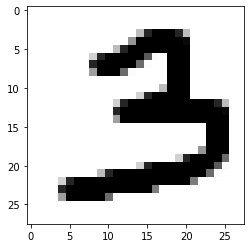

In [10]:
#用于标记图片标号，例如4就代表第四张图片。跟实际的图片上的数字没有直接关系
item = 2
#此函数用于绘制数字矩形数组
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')
#将正确结果赋值给correct_label变量
correct_label = our_own_dataset[item][0]
inputs = our_own_dataset[item][1:]
outputs = n.query(inputs)
#得到结果数组
print (outputs)
#将数组中最大值对应的数字赋值给label变量
label = numpy.argmax(outputs)
print("network says ", label)
#如果模型测试的结果与正确结果相同则显示match! 否则显示no match!
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass